<a href="https://colab.research.google.com/github/AFinch21/Golf-Machine-Learning/blob/main/driver_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting The 300yd Drive using Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

from google.colab import files


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Upload the data we need form local directory

In [2]:
#choose the master file
files.upload()


Saving driver_stats.csv to driver_stats.csv


{'driver_stats.csv': b'Date,Swing,Carry,Swing Speed,Ball Speed,Smash Factor,,,,,\r\n21/02/2021,1,202.6,88.5,126.5,1.429378531,,,,,\r\n21/02/2021,2,219.1,91.1,132.4,1.453347969,,,,,\r\n21/02/2021,3,234.8,97,141.7,1.460824742,,,,,\r\n21/02/2021,4,227,96,137.1,1.428125,,,,,\r\n21/02/2021,5,242.1,97,143.7,1.481443299,,,,,\r\n21/02/2021,6,205.9,97.8,129.8,1.327198364,,,,,\r\n21/02/2021,7,168,89.4,116.1,1.298657718,,,,,\r\n21/02/2021,8,205.3,97.8,128.8,1.316973415,,,,,\r\n21/02/2021,9,141.5,66.1,99.2,1.50075643,,,,,\r\n21/02/2021,10,194.3,96,131.5,1.369791667,,,,,\r\n21/02/2021,11,158.4,93.1,113.2,1.215896885,,,,,\r\n21/02/2021,12,204.1,95.6,135.9,1.421548117,,,,,\r\n21/02/2021,13,195.5,82.2,123,1.496350365,,,,,\r\n21/02/2021,14,195.1,96.4,129,1.338174274,,,,,\r\n21/02/2021,15,193.3,97,132.6,1.367010309,,,,,\r\n21/02/2021,16,210.7,97,134.4,1.38556701,,,,,\r\n21/02/2021,17,106.2,70.3,93.5,1.330014225,,,,,\r\n21/02/2021,18,201,96.4,128.8,1.336099585,,,,,\r\n21/02/2021,19,93.6,69.3,88.4,1.27561

## Import the dataset and visualise the actual swings

In [11]:

dataset = pd.read_csv('driver_stats.csv')
dataset = dataset.iloc[:, :-5]
dataset

,Date,Swing,Carry,Swing Speed,Ball Speed,Smash Factor
0,21/02/2021,1,202.6,88.5,126.5,1.429379
1,21/02/2021,2,219.1,91.1,132.4,1.453348
2,21/02/2021,3,234.8,97.0,141.7,1.460825
3,21/02/2021,4,227.0,96.0,137.1,1.428125
4,21/02/2021,5,242.1,97.0,143.7,1.481443
...,...,...,...,...,...,...
359,07/03/2021,360,229.0,102.9,144.6,1.410000
360,07/03/2021,361,244.6,104.3,149.5,1.430000
361,07/03/2021,362,245.6,104.1,149.2,1.430000
362,07/03/2021,363,231.7,103.7,144.0,1.390000


##Work out energy of each Impact

In [12]:
clubHeadWeight = 0.2
elasticity = 0.7
ballWeight = 0.046
impactTime = 0.0005


dataset["Club Speed (m/s)"] = dataset["Swing Speed"]*0.44704

dataset["Ball Speed (m/s)"] = dataset["Ball Speed"]*0.44704


dataset["Club Speed After Impact"] = dataset["Club Speed (m/s)"]  * (clubHeadWeight-(ballWeight*elasticity)) / (clubHeadWeight+ballWeight)

#=-(0.5•0.200kg•39.6m/s2 + 0.5•0.046kg•80.3m/s2 - 0.5•0.200kg•58.1m/s2)


dataset["Energy Lost During Impact"] = -(0.5*clubHeadWeight*dataset["Club Speed After Impact"]**2 + 0.5*ballWeight*dataset["Ball Speed (m/s)"]**2 - 0.5*clubHeadWeight*dataset["Club Speed (m/s)"]**2)

dataset["Impact Energy"] = ballWeight * dataset["Ball Speed (m/s)"] / impactTime

In [15]:
y = dataset.iloc[:, 2:-8].values
X = dataset.iloc[:, 1:-9].values


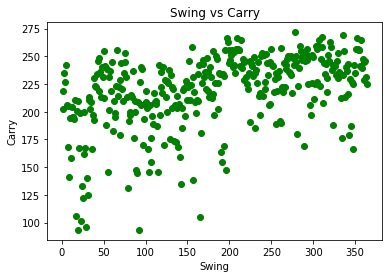

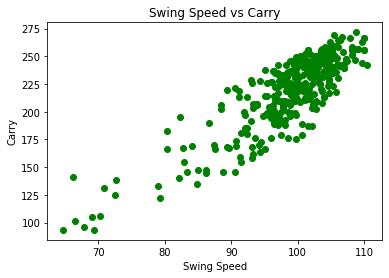

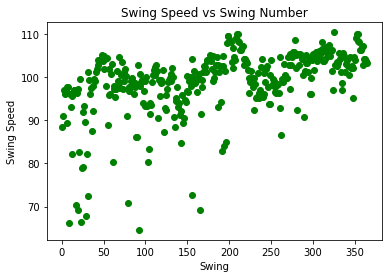

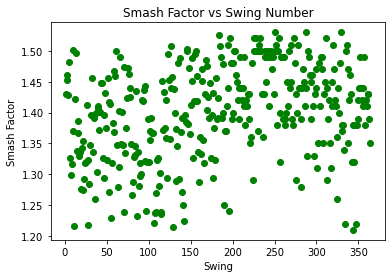

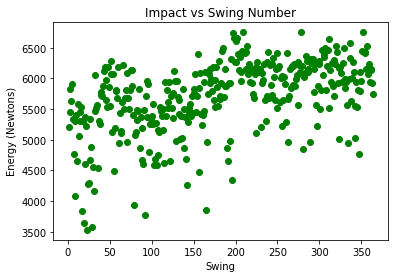

In [16]:


plt.scatter(X, y, color = 'green')
#plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Swing vs Carry')
plt.xlabel('Swing')
plt.ylabel('Carry')
plt.show()

plt.scatter(dataset['Swing Speed'], dataset['Carry'], color = 'green')
#plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Swing Speed vs Carry')
plt.xlabel('Swing Speed')
plt.ylabel('Carry')
plt.show()

plt.scatter(X, dataset['Swing Speed'], color = 'green')
#plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Swing Speed vs Swing Number')
plt.xlabel('Swing')
plt.ylabel('Swing Speed')
plt.show()

plt.scatter(dataset['Swing'], dataset['Smash Factor'], color = 'green')
#plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Smash Factor vs Swing Number')
plt.xlabel('Swing')
plt.ylabel('Smash Factor')
plt.show()

plt.scatter(dataset['Swing'], dataset['Impact Energy'], color = 'green')
#plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Impact vs Swing Number')
plt.xlabel('Swing')
plt.ylabel('Energy (Newtons)')
plt.show()


## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("The linear model is: Y = {:.5} + {:.5}X".format(regressor.intercept_[0], regressor.coef_[0][0]))


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

The linear model is: Y = 196.27 + 0.13253X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     100.0
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           5.97e-21
Time:                        14:57:23   Log-Likelihood:                -1750.6
No. Observations:                 364   AIC:                             3505.
Df Residuals:                     362   BIC:                             3513.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

## Predicting the Test set results

In [19]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

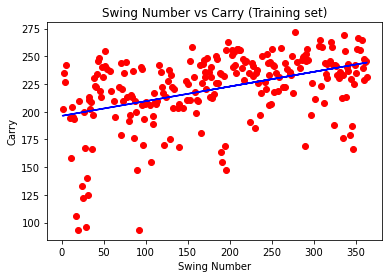

In [20]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Swing Number vs Carry (Training set)')
plt.xlabel('Swing Number')
plt.ylabel('Carry')
plt.show()

## Visualising the Test set results

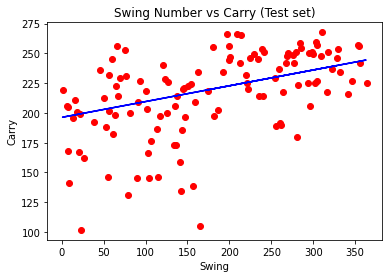

In [21]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Swing Number vs Carry (Test set)')
plt.xlabel('Swing')
plt.ylabel('Carry')
plt.show()

In [29]:

def predictDistance(yard):
  #distance = regressor.intercept_ + (swingNum*regressor.coef_)
  distance = (yard - regressor.intercept_)/regressor.coef_
  return distance.item(0,0)

def printStats(minSwing, maxSwing, toggle):
    if(toggle=="All"):
      minSwing = 0
      maxSwing = len(dataset)

    print("Total Swings ", len(dataset))
    print("Swings selected: ", minSwing, " to ", maxSwing)
    print("Forecast swing number for 300yd drive: ",predictDistance(300))
    print("Average Carry (Yds): ", dataset["Carry"].loc[minSwing:maxSwing].mean(), "YDS")
    print("Average Ball Speed (MPH): ", dataset["Ball Speed"].loc[minSwing:maxSwing].mean(), "MPH")
    print("Average Swing Speed (MPH): ", dataset["Swing Speed"].loc[minSwing:maxSwing].mean(), "MPH")
    print("Average Impact Energy (Newtons): ", dataset["Impact Energy"].loc[minSwing:maxSwing].mean(), "N")

    print(" ")

    print("Record Carry (Yds): ", dataset["Carry"].loc[minSwing:maxSwing].max(), "YDS")
    print("Record Ball Speed (MPH): ", dataset["Ball Speed"].loc[minSwing:maxSwing].max(), "MPH")
    print("Record Swing Speed (MPH): ", dataset["Swing Speed"].loc[minSwing:maxSwing].max(), "MPH")
    print("Record Impact Energy (Newtons): ", dataset["Impact Energy"].loc[minSwing:maxSwing].max(), "N")

    print(" ")

    print("Total Carry (Metres): ", (dataset["Carry"].sum()*0.91),"M")
    print("Total Energy (Newtons): ", (dataset["Impact Energy"].sum()*0.91),"N")

printStats(0, 364, "x")



Total Swings  364
Swings selected:  0  to  364
Forecast swing number for 300yd drive:  782.6804502334785
Average Carry (Yds):  219.05824175824162 YDS
Average Ball Speed (MPH):  138.61758241758244 MPH
Average Swing Speed (MPH):  98.89890109890109 MPH
Average Impact Energy (Newtons):  5701.019572043959 N
 
Record Carry (Yds):  271.7 YDS
Record Ball Speed (MPH):  164.2 MPH
Record Swing Speed (MPH):  110.4 MPH
Record Impact Energy (Newtons):  6753.165055999999 N
 
Total Carry (Metres):  72560.852 M
Total Energy (Newtons):  1888405.72304384 N
